In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')
c=0
c1=0
print(df.head())
for i in df['Survived']:
  c1+=1
  if i==1:
    c+=1
print("Total Passengers Count: "+str(c1))
print("Passenger Survived: "+str(c))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
To

Accuracy: 0.7988826815642458
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[89 16]
 [20 54]]


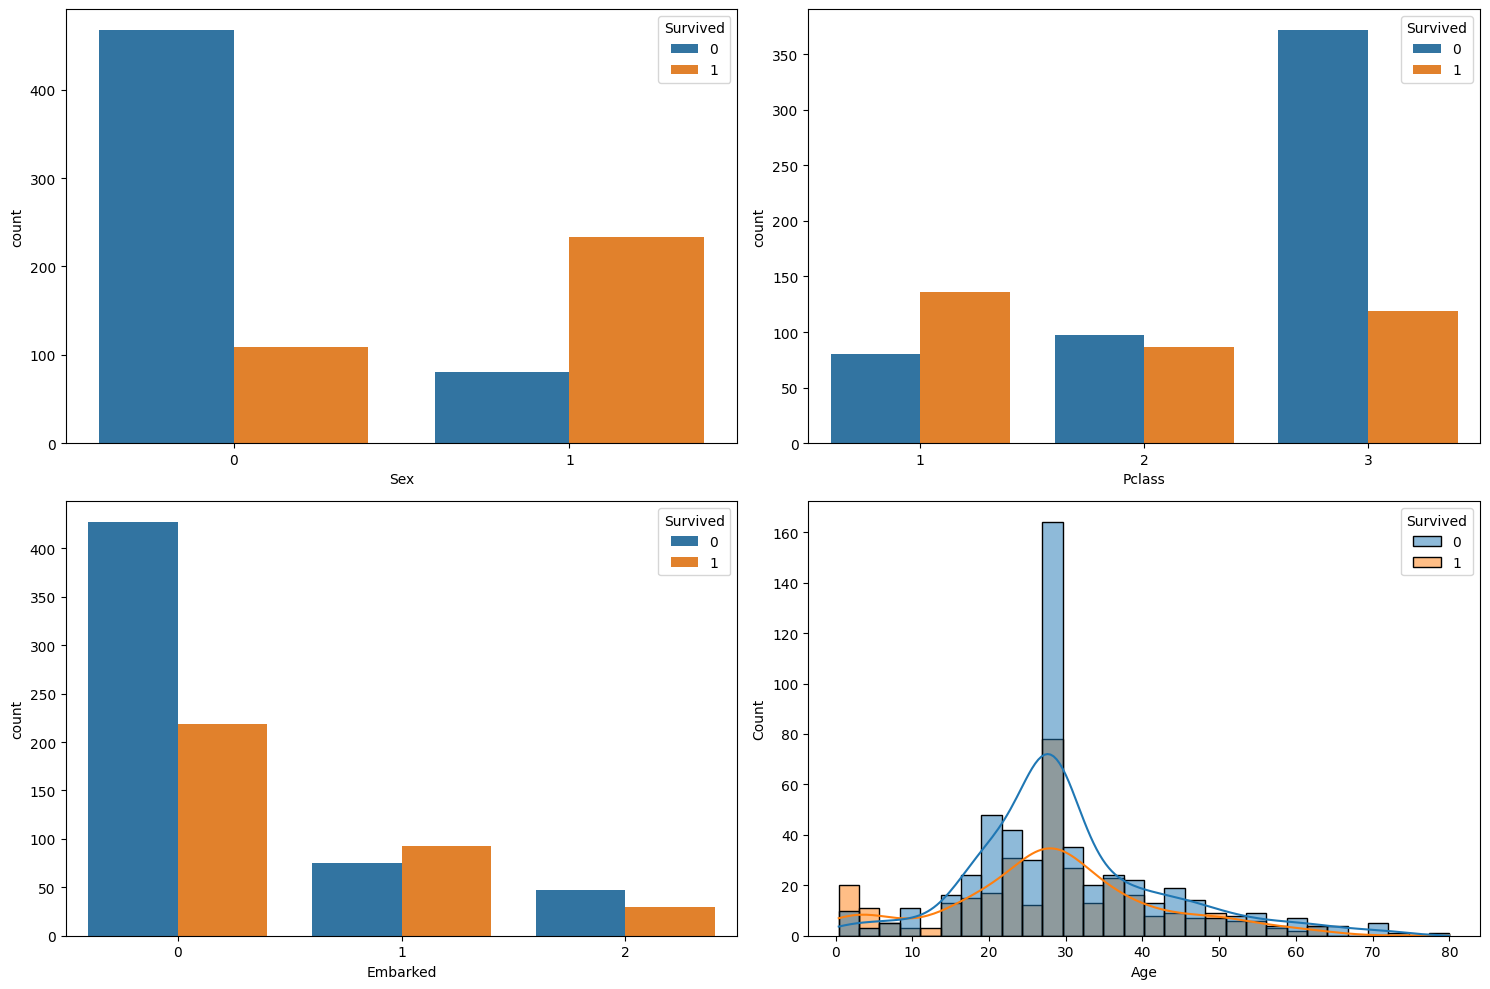

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Titanic dataset
titanic_df = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')

# Data preprocessing
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_df[features]
y = titanic_df['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(15, 10))

# Survival by Sex
plt.subplot(2, 2, 1)
sns.countplot(x='Sex', hue='Survived', data=titanic_df)

# Survival by Pclass
plt.subplot(2, 2, 2)
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)

# Survival by Embarked
plt.subplot(2, 2, 3)
sns.countplot(x='Embarked', hue='Survived', data=titanic_df)

# Survival by Age
plt.subplot(2, 2, 4)
sns.histplot(data=titanic_df, x='Age', hue='Survived', kde=True)

plt.tight_layout()
plt.show()

